# Info

[<img align="right" width="400" height="400" src="https://github.com/ML-IGP-TUBS-2025/Julian-Thoms/blob/master/Assignments/Assignment08-Decison%20trees/assets/TUBS_IGP_logo.jpg?raw=1">](https://www.tu-braunschweig.de/en/igp)

[Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) ([m.maboudi@tu-bs.de](m.maboudi@tu-bs.de))

[Technical University of Braunschweig](https://www.tu-braunschweig.de/en/)  
[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/igp)  


**Decision Tree exercise**  
Complete and hand in this worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.
***
In this exercise you will:
- implement a CART-like Decision Tree on [**Iris dataset**](https://en.wikipedia.org/wiki/Iris_flower_data_set)

# Setup

In [21]:
import numpy as np
import os

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

#ganzes Assignment auf google drive hochladen
#from importlib import reload #unsupported by python 3.12

seed = 57

ModuleNotFoundError: No module named 'imp'

In [5]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print("Clear previously loaded data.")
except:
    pass

# Iris dataset

In this assignment you are asked to separate 3 classes of Iris dataset.  
We will use just using petal length and petal width.

In [2]:
from sklearn.datasets import load_iris


def Import_Iris_data():
    iris = load_iris()
    X = iris.data[:, 2:]  # petal length and width
    y = iris.target
    Classes = np.unique(y)

    return X, y, Classes


X, y, Classes = Import_Iris_data()

## visualize dataset

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_samples_classification(X, y,clf=None,figsize=(8, 4)):
    plt.figure(figsize=figsize)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "g^", label="Iris virginica")

    view_scale = 0.05
    x1min, x1max = np.min(X[:, 0]), np.max(X[:, 0])
    x1min -= view_scale * (x1max - x1min)
    x1max += view_scale * (x1max - x1min)

    x2min, x2max = np.min(X[:, 1]), np.max(X[:, 1])
    x2min -= view_scale * (x2max - x2min)
    x2max += view_scale * (x2max - x2min)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18)


    if clf: #there is a classifier
        x1s = np.linspace(x1min, x1max, 100)
        x2s = np.linspace(x2min, x2max, 100)
        x1, x2 = np.meshgrid(x1s, x2s)
        X_new = np.c_[x1.ravel(), x2.ravel()]
        y_pred = clf.predict(X_new).reshape(x1.shape)
        custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
        plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
        plt.title(f"decision boundaries of Decision Tree")


    plt.show()

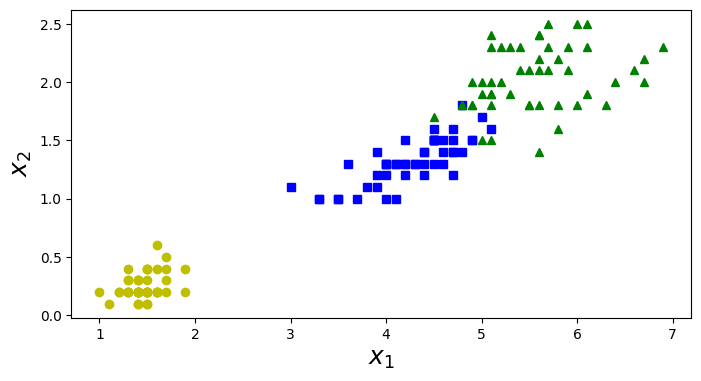

In [4]:
plot_samples_classification(X, y)

# Decision Tree Classification

## Finding all the candidates for splitting the current node (20pnts)

First, open `TUBS_1120019/decision_tree_classifier/split.py` and implement the function *find_Candidates_for_Splitting_thisFeature* that computes the possible candidates for splitting a feature. Then run the code below:

In [7]:
#from TUBS_1120019.decision_tree_classifier.split import find_Candidates_for_Splitting_thisFeature
#direkt hier her importiert

def find_Candidates_for_Splitting_thisFeature(This_Feature,labels):
    """
    An iterative approach for all samples:
    If label of a sample is different from its next neighbour's,
    their mean on This_feature will be considered as candidates for splitting "This_Feature".


    Inputs:
        - This_Feature: A numpy array of shape (N,) containing the "This_Feature" values of all samples in the current node
        --> eine Spalte , die die X-Werte für unser ausgewähltes Feature beinhaltet
        - y: A numpy array of shape (N,) containing the labels of all samples in the current node, where
             y[i] is the label for This_Feature[i].

    Outputs:
        - split_candidates: A list containing all candidates for splitting the current feature
    """

    split_candidates=[]

   #####################################################################
   # TODO:                                                             #
   # Compute the candidates for splitting This_Feature.                #
   # You should first sort the samples based on This_Feature values    #
   # Then considering all feature values which                         #
   # correspond to the class change as a candidate.                    #
   # Final split_candidates are a set constaining the mean between     #
   # each candidate and next feature value of This_Feature.            #
   #####################################################################
   # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #Features sortieren
    #argsort sortiert nur die Indizes, nicht die Werte des Arrays
    # andere Möglichkeit: beide Spalten zusammenfügen: data=np., dann sortieren
    sorted_values=np.argsort(This_Feature)
    sorted_This_Feature=This_Feature[sorted_values]
    sorted_labels=labels[sorted_values]

    #class change
    for i in range(len(sorted_values)-1):
      if sorted_labels[i]!=sorted_labels[i+1]:
        #Mittelwert wird als Wert zum splitten von This_feature genutzt
        candidate=(sorted_This_Feature[i]+sorted_This_Feature[i+1])/2
        split_candidates.append(candidate)

   # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


    return split_candidates

candidates = []
print("split candidates:")
for feature in range(X.shape[1]):
    candidates_this_feature = find_Candidates_for_Splitting_thisFeature (X[:,feature],y)

    print(f"feature{feature} candidates:{candidates_this_feature}")
    candidates.append([candidates_this_feature])

split candidates:
feature0 candidates:[np.float64(2.45), np.float64(4.5), np.float64(4.5), np.float64(4.8), np.float64(4.85), np.float64(4.9), np.float64(4.9), np.float64(4.95), np.float64(5.0), np.float64(5.05), np.float64(5.1), np.float64(5.1)]
feature1 candidates:[np.float64(0.8), np.float64(1.4), np.float64(1.45), np.float64(1.5), np.float64(1.5), np.float64(1.5), np.float64(1.5), np.float64(1.6), np.float64(1.7), np.float64(1.75), np.float64(1.8), np.float64(1.8)]


## Impurity measures (6 pnts)

open `TUBS_1120019/decision_tree_classifier/Impurity.py` and implement the functions *Entropy* and *Gini* and run the code below:

In [24]:
#from TUBS_1120019.decision_tree_classifier.Impurity import Compute_Impurity

def Entropy(p):
    """
    Compute the entropy index using the given probabilities

    Inputs:
    - p: A numpy array of shape (K, 1) containing probilities of all K classes in the dataset

    Returns:
    - entropy_: float: entropy of the samples in the node
    """
    entropy_ = 0.0
    #####################################################################
    # TODO:                                                             #
    # Compute the entropy index using the given probabilities           #
    #####################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    for element in p:
      entropy_+=(-element*np.log2(element))

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return entropy_


def Gini(p):
    """
    Compute the Gini index using the given probabilities

    Inputs:
    - p: A numpy array of shape (K, 1) containing probilities of all K classes in the dataset

    Returns:
    - gini_: float: gini index of the samples in the node
    """
    gini_ = 0.0
    #####################################################################
    # TODO:                                                             #
    # Compute the Gini index using the given probabilities              #
    #####################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    for element in p:
      gini_+=(1-element**2)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return gini_


def Compute_Impurity(y,Classes,criterion='gini'):
    """
    Compute the impurity of the labels using the given Classes and criterion

    Inputs:
    - y: A numpy array of shape (n, ) containing labels
    - Classes: Numpy array of size (K,) containing the labels of classes in the dataset
    - criterion: string:  impurity index

    Returns:
    - : float: impurity index of the labels
    """
    count=[0.]*len(Classes)
    for c in Classes:
        count[c]=np.count_nonzero(y==c)
    p=count/np.sum(count)

    if   criterion.lower() == 'gini':
        return Gini(p)
    elif criterion.lower() == 'entropy':
        return Entropy(p)
    else:
        raise NameError("Impurity criterion must be gini or entropy")



impurity_criterion='entropy'
node_impurity = Compute_Impurity(y,Classes,criterion=impurity_criterion)
print("impurity_criterion Entropy =", node_impurity)


impurity_criterion='gini'
node_impurity = Compute_Impurity(y,Classes,criterion=impurity_criterion)
print("impurity_criterion Gini=", node_impurity)

impurity_criterion Entropy = 1.584962500721156
impurity_criterion Gini= 2.6666666666666665


## Selecting the best candidate for splitting the current node

### Evaluate each binary split (15 pnts)

In `TUBS_1120019/decision_tree_classifier/split.py` implement the function *evaluate_binary_split* to compute the overall impurity of the child nodes after a binary split. Then run the code below:  
splitting candidate which results to minimum overall impurity of the child nodes would be the best choice for this node.

In [27]:
#from TUBS_1120019.decision_tree_classifier.split import evaluate_binary_split

#from .Impurity import Compute_Impurity
def evaluate_binary_split(feature,labels,Classes,Threshold,criterion='gini'):
    """
    evaluates a Binary split of the samples (given their one feature and labels)
    Note: Split is binary, but it could manage multi-class dataset


    Inputs:
        - feature: A numpy array of shape (N,) containing the this feature values of all samples in the current node
        - labels: A numpy array of shape (N,) containing the labels of all samples in the current node, where
             y[i] is the label for feature[i].
        - Classes: list of integers contating K integers as Class labels
        - Threshold: Threshold (on feature) for dividing the samples into two sets
          (feature values equal or less than the threshold as one set and
           feature values greater than the threshold as another sample)

    Outputs:
        - overall_impurity_child_nodes: float:
          contains weighted sum of impurities of set1 and set2 (in a binary split by applying Threshold on feature)
             overall_impurity_child_nodes = N1/N*I1+N2/N*I2
                where N is: number of samples in the parent node, and
                N1 and N2: number of samples in set1 and set2
                I1 and I2: Impurity of set1 and set2, accordingly

    """
    overall_impurity_child_nodes = None
   #####################################################################
   # TODO:                                                             #
   # Compute overall_impurity_after_binary_split                       #
   # The output is a nice measure for deciding about                   #
   # the best featur for and best value for splitting the samples      #
   # You should first use threshold to make two sets from the samples  #
   # Then compute the impurity of each set                             #
   # Finally, compute the overall_impurity_after_binary_split          #
   #####################################################################
   # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #Threshold ist der Wert, an dem wir die features splitten(vorher haben wir mögliche split_candidates berechnet)
    #Hier: labels werden gesplittet
    set1_labels=labels[feature<=Threshold]
    set2_labels=labels[feature>Threshold]

    I1=Compute_Impurity(set1_labels,Classes,criterion)
    I2=Compute_Impurity(set2_labels,Classes,criterion)

    overall_impurity_child_nodes=(len(set1_labels)/len(labels))*I1+(len(set2_labels)/len(labels))*I2


    #feature 0 und 1 für petal_width und petal_length
    #die beiden Stellen mit nan lassen volle Reinheit beim split zu (die eine Irissorte ist isoliert, die anderen dichter zusammen)

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return overall_impurity_child_nodes

#bis hier importiert
for feature in range(len(candidates)):
    for c in candidates[feature][0]:
        overall_impurity_after_split = evaluate_binary_split(
            X[:, feature], y, Classes, Threshold=c, criterion="entropy")

        print(f"feature: {feature}, splitting candidate:{c:.4f}, overall_impurity_child_nodes: {overall_impurity_after_split:.6f}")

feature: 0, splitting candidate:2.4500, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:4.5000, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:4.5000, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:4.8000, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:4.8500, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:4.9000, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:4.9000, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:4.9500, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:5.0000, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:5.0500, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:5.1000, overall_impurity_child_nodes: nan
feature: 0, splitting candidate:5.1000, overall_impurity_child_nodes: nan
feature: 1, splitting candidate:0.8000, overall_impurity_child_nodes: nan
feature: 1, splitting candidate:1.4000

/tmp/ipython-input-3940156076.py:21: RuntimeWarning: divide by zero encountered in log2
  entropy_+=(-element*np.log2(element))
/tmp/ipython-input-3940156076.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  entropy_+=(-element*np.log2(element))


### greedy selection of the best split (10 pnts)

Now, you are ready to find the best split (feature and threshold) for splitting a binary node.
open `TUBS_1120019/decision_tree_classifier/Node.py` and implement the function *__find_best_split* for greedy selection of the best split of a binary node. Then run the code below:

In [ ]:
#from TUBS_1120019.decision_tree_classifier.Node import BinaryNode

#ab hier importiert
class BinaryNode:
  # This class is defined for Binary Decision Trees

    def __init__(self,samples,labels,Classes,
                 Impurity_criterion = 'gini',
                 parentID=None,Branch = True):

        self.__check_inputs(samples,labels)
        self.__assign_ID(parentID, Branch)
        self.depth = len(self.ID)-1
        self.num_samples =  self.samples.shape[0]
        self.__count_samples_per_class(Classes)
        self.probs=self.count/np.sum(self.count)
        self.impurity_criterion = Impurity_criterion.lower()
        self.__compute_impurity()
        self.Classes = Classes
        self.Class = np.argmax(self.count) #majority voting
        if self.impurity==0:
            self.splittable = False
            self.splitting_feature__ = None
            self.splitting_feature_Threshold__ = None
        else:
            self.splittable = True
            self.set_splitting_feature_and_threshold()


    def __check_inputs(self,samples,labels):
        if samples.shape[0]==len(labels):
            self.samples = samples
            self.labels  = labels
        else:
            raise NameError("Check Input data")

    def __assign_ID(self,parentID,Branch):
        if parentID is None:#Root Node
            self.ID=[0]
        elif Branch == True:
            self.ID = parentID+[1]
        else:
            self.ID = parentID+[0]


    def __compute_impurity(self):
        """
        A method for computing the impurity of the samples in the Node(self)
        """
        if self.impurity_criterion == 'gini':
            self.impurity = Gini(self.probs)
        elif self.impurity_criterion == 'entropy':
            self.impurity = Entropy(self.probs)
        else:
            raise NameError("Undefined impurity criterion.")


    def set_splitting_feature_and_threshold(self,splitting_feature='None',splitting_feature_Threshold='None'):
        if (splitting_feature != 'None') and (splitting_feature_Threshold != 'None'):
            self.splitting_feature__ = splitting_feature
            self.splitting_feature_Threshold__ = splitting_feature_Threshold
        else:
            self.__find_best_split()


    def __find_best_split(self):
        """
        Compute the best split of the Node.
        splitting_feature__ and splitting_feature_Threshold__ should be computed based on overall impurity after split

        Inputs:
        - self: Node

        Returns:
        - sets the following attributes of "self"(object):
             .splitting_feature__: int: selected feature for aplitting the samples of this Node
             .splitting_feature_Threshold__: float: splitting threshold of the selected feature (splitting_feature__)
             .splittable = True or False

        """

        num_features = self.samples.shape[1]
        best_feature = None
        best_split_value=None
        best_impurity = self.impurity

        for feature in range(num_features):
            #####################################################################
            # TODO:                                                             #
            # Compute the candidates for splitting the samples using feature:   #
            # use find_Candidates_for_Splitting_thisFeature in "split.py"       #
            #####################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            split_features: int=None
            split_feature=find_Candidates_for_Splitting_thisFeature(feature,)


            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


            #####################################################################
            # TODO:                                                             #
            # use evaluate_binary_split function in "split.py" in a for loop to #
            # evaluate each candidate of current feature to                     #
            # update 2 parameters best_feature, and best_split_value            #
            #####################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    N=len(labels)
    N1=len(set1_labels)
    N2=len(set2_labels)
    I1=Compute_Impurity(set1_labels,Classes,criterion)
    I2=Compute_Impurity(set2_labels,Classes,criterion)

    #Gesamt-Reinheit wird für diesem split bei diesem Threshold berechnet
    overall_impurity_child_nodes=(N1/N)*I1+(N2/N)*I1
          for element in

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


        if (best_feature==None or best_split_value==None):
            self.splittable = False
            self.splitting_feature__ = None
            self.splitting_feature_Threshold__ = None
        else:
            self.splitting_feature__ = best_feature
            self.splitting_feature_Threshold__ = best_split_value
            self.splittable = True

    def binary_split(self):
        """
        Binary split of the node using splitting_feature__ and splitting_feature_Threshold__ attributes

        Inputs:
        - self: Node

        Returns:
        - Node_True_branch, Node_False_branch: two objects of Class "BinaryNode" which contain samples after split

        """
        if self.splittable is False:
            raise ValueError (f"Node{self.ID} is not splittable")

        #####################################################################
        # TODO:                                                             #
        # split the samples (and correspoding labels) to two parts:         #
        #     "True_samples" and "True_samples_labels"                      #
        #     "False_samples" and "False_samples_labels"                    #
        # True means <=   (less than or equal to threshold)                 #
        # False means >   (greater thanthreshold)                           #
        #####################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****



        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


        # let's instantiate two objects from BinaryNode Class for each branch:
        Node_True_branch = BinaryNode(samples=True_samples,labels=True_samples_labels,
                                      Classes=self.Classes,Impurity_criterion=self.impurity_criterion,
                                      parentID=self.ID,Branch =True)

        Node_False_branch = BinaryNode(samples=False_samples,labels=False_samples_labels,
                                       Classes=self.Classes,Impurity_criterion=self.impurity_criterion,
                                       parentID=self.ID,Branch = False)

        return Node_True_branch, Node_False_branch


    def __count_samples_per_class(self, Classes):
        """
        count the number of Node samples in each class

        Inputs:
        - self: Node
        - Classes: Numpy array of size (K,) containing the labels of classes in the dataset

        Returns:
        - sets the attribute "count" for the Node , where
            count[i] is the number of samples with the label Classes[i].

        """
        self.count=np.zeros(Classes.shape[0])
        for c in Classes:
            self.count[c]=np.count_nonzero(self.labels==c)

    def describe(self):
        '''
        helper function to print the Node information
        '''
        print("---------------------------")
        print("Describing Node{}:".format(self.ID))
        print(f'depth ={self.depth}, ID = {self.ID}')
        if self.splittable:
            print(f"leaf?: {not self.splittable}, splitting_feature__={self.splitting_feature__}, splitting_threshold: {self.splitting_feature_Threshold__}")
        else:
            print(f"leaf?: {not self.splittable}")

        print(f'samples = {self.num_samples}, counts = {self.count}, proabilities = {self.probs}')
        print(f'impurity: {self.impurity_criterion} = {self.impurity:3.5}')
        print(f'Class: {self.Class}')#Most_Frequent_samples are from class

#bie hier importiert
binary_node = BinaryNode(X,y,Classes,'entropy')
binary_node.describe()

---------------------------
Describing Node[0]:
depth =0, ID = [0]
leaf?: True
samples = 150, counts = [50. 50. 50.], proabilities = [0.33333333 0.33333333 0.33333333]
impurity: entropy = 1.585
Class: 0


### Binary split at each node (10)

After finding the best split of a node, implement the function *binary_split* in `TUBS_1120019/decision_tree_classifier/Node.py` to split the binary node to 2 child nodes. Then run the code below:

In [ ]:
node_true,node_false = binary_node.binary_split()
node_true.describe()
node_false.describe()


Building block (node) of our Decision Tree classifier is ready.  
we provided an implementation of training and prediction of decision tree classifier for you in `TUBS_1120019/decision_tree_classifier/decision_tree.py`  

we will:
- First split the dataset into train and test set
- Use BinaryDecisonTree class and training set to train the classifer
- Evaluate the classifier on test set

## Split the data into train and test set

In [ ]:
from TUBS_1120019.data_utils import split_into_2_sets

X_train, X_test, y_train, y_test = split_into_2_sets(
    X, y, first_set_size=0.8, shuffle=True, random_state=seed)

# As a sanity check of loading the dataset, we print out the size of the training and test data.
print("Training data shape: ", X_train.shape, X_train.dtype)
print("Training labels shape: ", y_train.shape, y_train.dtype)
print("Test data shape: ", X_test.shape, X_test.dtype)
print("Test labels shape: ", y_test.shape, y_test.dtype)

In [ ]:
from TUBS_1120019.decision_tree_classifier.decision_tree import BinaryDecisonTree


DT_clf = BinaryDecisonTree(X_train, y_train, Classes, impurity_criterion="entropy")

DT_clf.train()

You can print the details of the trained decision tree:

In [ ]:
DT_clf.print_tree()

In [ ]:
y_train_pred = DT_clf.predict(X_train)
train_accuracy = np.mean(y_train == y_train_pred)
print("Decision Tree: train set accuracy: %f" % train_accuracy)

We already now that naive decision trees are prone to overfitting.
So, we expect the training accuracy to be "almost" 100%  

## Report the results on test set

In [ ]:
y_test_pred = DT_clf.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print("Decision Tree: test set accuracy: %f" % test_accuracy)

**Inline Question** (4pnts)
- Inspite of expected overfitting (training accuracy~100%), test accuracy is also very high. Do you know why that happens?  
<font color='blue'>*Your Explanation*:</font>

## Visualize the decision boundary

In [ ]:
plot_samples_classification(X, y, DT_clf)

# Check with scikit-learn

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42, criterion="entropy")
tree_clf.fit(X_train, y_train)

In [ ]:
y_test_pred = tree_clf.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print("Decision Tree: test set accuracy: %f" % test_accuracy)

In [ ]:
plot_samples_classification(X, y, tree_clf)

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 12))
plot_tree(tree_clf)
plt.show()

# Recursion (30pnts)

**Backup your files or push them in your repository and then continue.**

we provided an implementation of training and prediction of decision tree classifier for you in `TUBS_1120019/decision_tree_classifier/decision_tree.py`.
In our code, prediction is implemented as a recursive function.

You task is to write a recursive function for training method.  
Rename the non-recursive function (that is already in the file) to training_non_recursive.